<a href="https://colab.research.google.com/github/ShrayankM/Covid-19_India_Analysis/blob/master/Covid_19_India_(18_04_2020).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.patches as mpatches

In [0]:
covid_main_data = pd.read_csv("covid_19_india_(18-04-2020).csv")

In [232]:
covid_main_data.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3


In [0]:
state_names = covid_main_data['State/UnionTerritory']
state_nameSet = set(state_names)

In [0]:
state_nameSet.remove('Unassigned')
state_nameSet.remove('Nagaland#')

In [0]:
confirmed = covid_main_data['Confirmed']
cured = covid_main_data['Cured']
death = covid_main_data['Deaths']

In [0]:
state_wise_dict = dict()
for state in state_nameSet:
    state_confirmed = np.array(confirmed[state_names == state])
    state_cured = np.array(cured[state_names == state])
    state_death = np.array(death[state_names == state])
    state_wise_dict[state] = [state_confirmed[-1],state_cured[-1],state_death[-1]]

In [0]:
dates = covid_main_data['Date']
dates_set = set(dates)

In [0]:
date_wise_dict = dict()
for date in dates_set:
    cases_sum =  sum(confirmed[dates == date])
    cured_sum = sum(cured[dates == date])
    death_sum = sum(death[dates == date])
    date_wise_dict[date] = [cases_sum,cured_sum,death_sum]

In [0]:
date_keys = list(date_wise_dict.keys())
date_keys.sort(key=lambda date: datetime.strptime(date,"%d/%m/%y"))

In [0]:
date_wiseSorted_dict = dict()
for date in date_keys:
    date_wiseSorted_dict[date] = date_wise_dict[date]

**Change in Cases**

In [0]:
cases_only = []
for value in date_wiseSorted_dict.values():
    cases_only.append(value[0])

In [0]:
cases_only = np.array(cases_only)

In [0]:
new_cases = cases_only[1:]
old_cases = cases_only[0:len(new_cases)]
change_inCases = np.array((new_cases  - old_cases))

In [244]:
print(change_inCases)

[   0    1    1    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    2    1   22    2    1    3    5    7   12    2   14
    7    3   26    4   23   14   22   50   60   77   73   86   87   88
   30  185  115  227  146  437  235  478  525  505  704  508  485  591
  896  768  918  905 1463 1118  826]


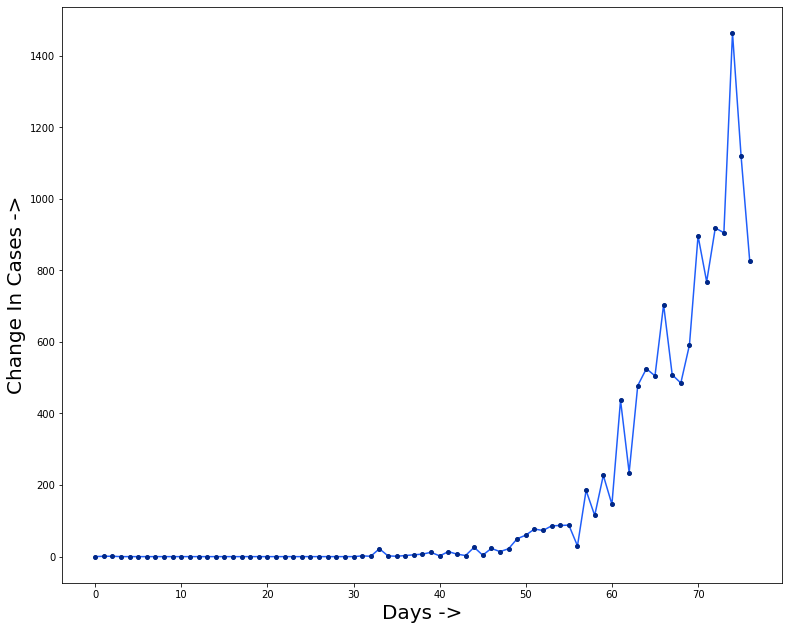

In [245]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
days = np.arange(0,len(cases_only)-1,1)
cases_change = change_inCases
ax.plot(days,cases_change,color='#1F5EFA',marker='o',markersize = 4,markerfacecolor='#002787',markeredgecolor='#002787')
plt.xlabel('Days ->', fontsize=20)
plt.ylabel('Change In Cases ->', fontsize=20)
plt.gcf().set_size_inches([10,8])
plt.show()

**Change in Cured**

In [0]:
cured_only = []
for value in date_wiseSorted_dict.values():
    cured_only.append(value[1])

In [0]:
cured_only = np.array(cured_only)

In [0]:
new_cases = cured_only[1:]
old_cases = cured_only[0:len(new_cases)]
change_inCured = np.array((new_cases  - old_cases))

In [249]:
print(change_inCured)

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   3   0   0   0
   0   0   0   0   0   0   0   7   3   0   1   0   6   3   0   1   0  16
   3   2  22  13  16   6  22  20  12   7  50  62  44  34  58  67  38 137
 112 215 210 154 171]


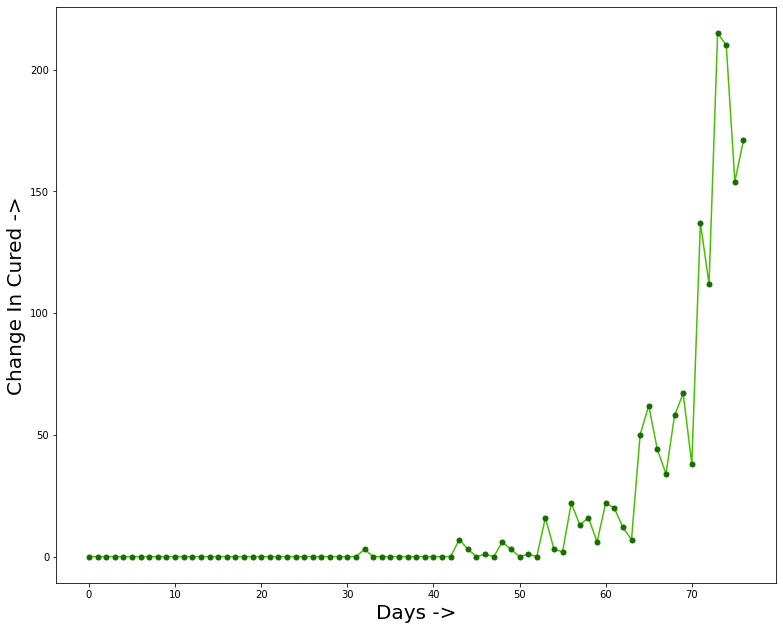

In [250]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
days = np.arange(0,len(cured_only)-1,1)
cured_change = change_inCured  
ax.plot(days,cured_change,color='#48BF00',marker='o',markersize = 5,markerfacecolor='#156D00',markeredgecolor='#156D00')
plt.xlabel('Days ->', fontsize=20)
plt.ylabel('Change In Cured ->', fontsize=20)
plt.gcf().set_size_inches([10,8])
plt.show()

**Change in Death**

In [0]:
death_only = []
for value in date_wiseSorted_dict.values():
    death_only.append(value[2])

In [0]:
death_only = np.array(death_only)

In [0]:
new_cases = death_only[1:]
old_cases = death_only[0:len(new_cases)]
change_inDeath  = np.array((new_cases  - old_cases))

In [254]:
print(change_inDeath)

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  0  0  1  0
  1  0  0  3  0  2  1  5  2  2  8  4  4  6 12  9 13  8 28 13 25 20 37 36
 31 51 29 39 28]


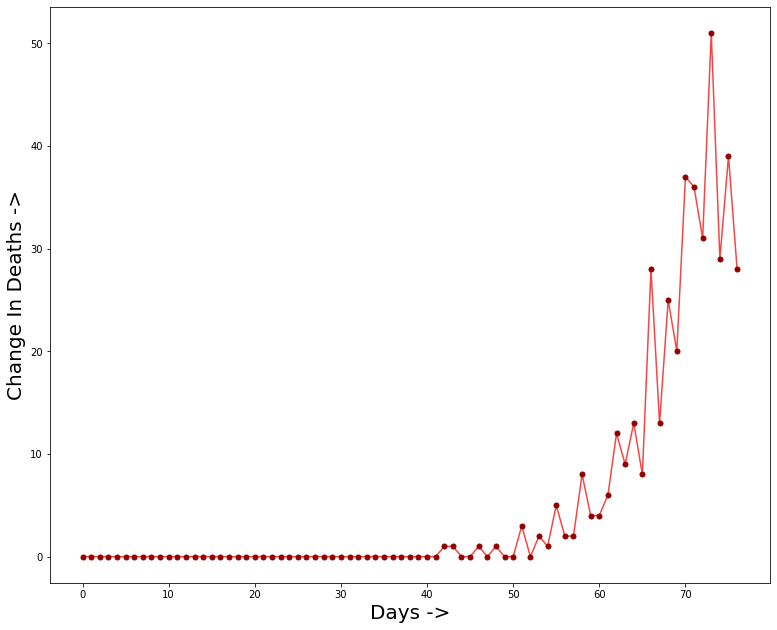

In [255]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
days = np.arange(0,len(death_only)-1,1)
death_change = change_inDeath 
ax.plot(days,death_change,color='#F64545',marker='o',markersize = 5,markerfacecolor='#900000',markeredgecolor='#900000')
plt.xlabel('Days ->', fontsize=20)
plt.ylabel('Change In Deaths ->', fontsize=20)
plt.gcf().set_size_inches([10,8])
plt.show()

In [0]:
cases_change = cases_change + 1
cases_normalized = (cases_change - np.min(cases_change))/(np.max(cases_change)-np.min(cases_change)) 

In [0]:
cured_change = cured_change + 1
cured_normalized = (cured_change - np.min(cured_change))/(np.max(cured_change) - np.min(cured_change))

In [0]:
death_change = death_change + 1
death_normalized = (death_change - np.min(death_change))/(np.max(death_change) - np.min(death_change))

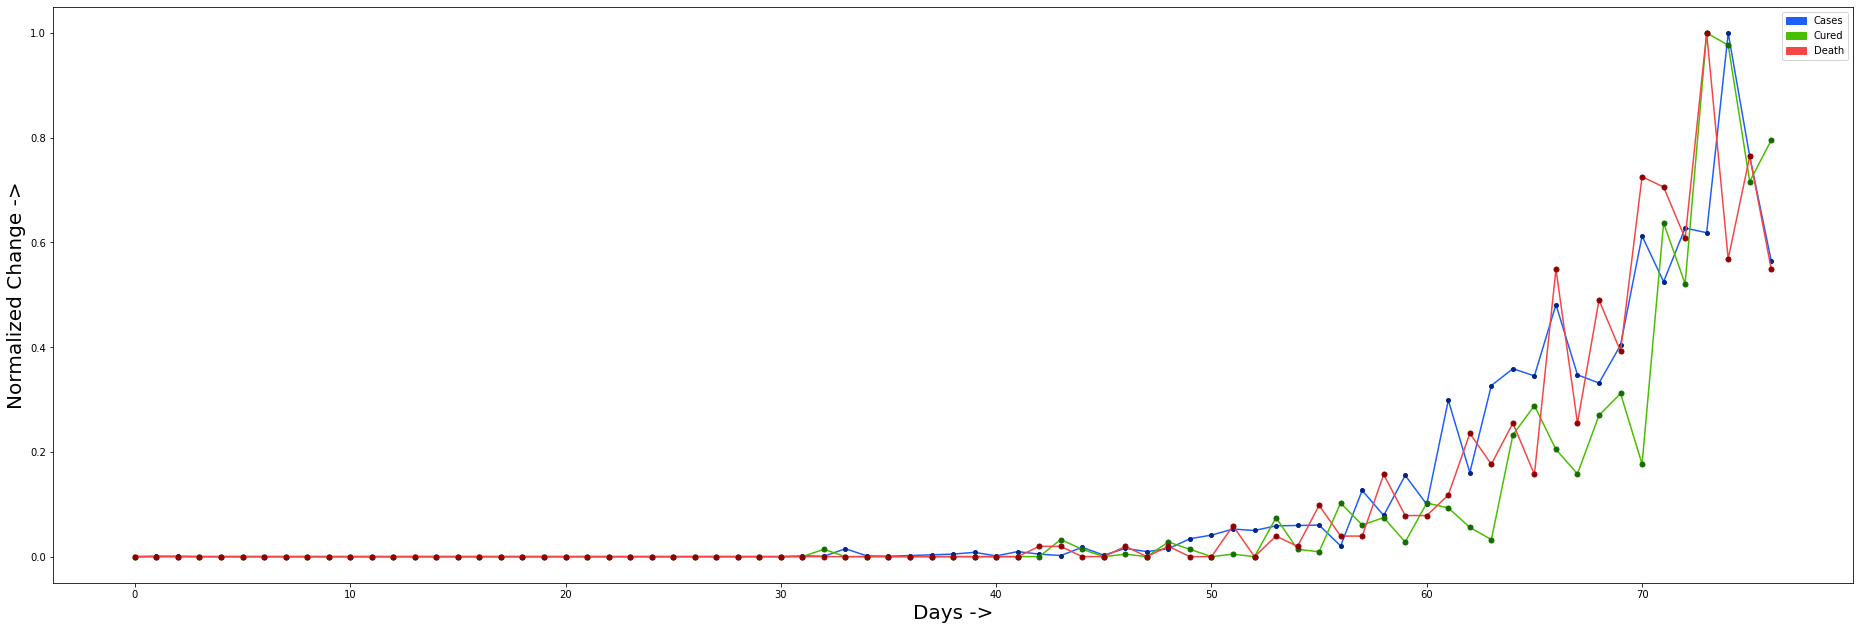

In [259]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(days,cases_normalized,color='#1F5EFA',marker='o',markersize = 4,markerfacecolor='#002787',markeredgecolor='#002787')
ax.plot(days,cured_normalized,color='#48BF00',marker='o',markersize = 5,markerfacecolor='#156D00',markeredgecolor='#156D00')
ax.plot(days,death_normalized,color='#F64545',marker='o',markersize = 5,markerfacecolor='#900000',markeredgecolor='#900000')
plt.xlabel('Days ->', fontsize=20)
plt.ylabel('Normalized Change ->', fontsize=20)
case_patch = mpatches.Patch(color='#1F5EFA', label='Cases')
cured_patch = mpatches.Patch(color='#48BF00',label='Cured')
death_patch = mpatches.Patch(color='#F64545',label='Death')
plt.legend(handles=[case_patch,cured_patch,death_patch])
plt.gcf().set_size_inches([25,8])
plt.show()

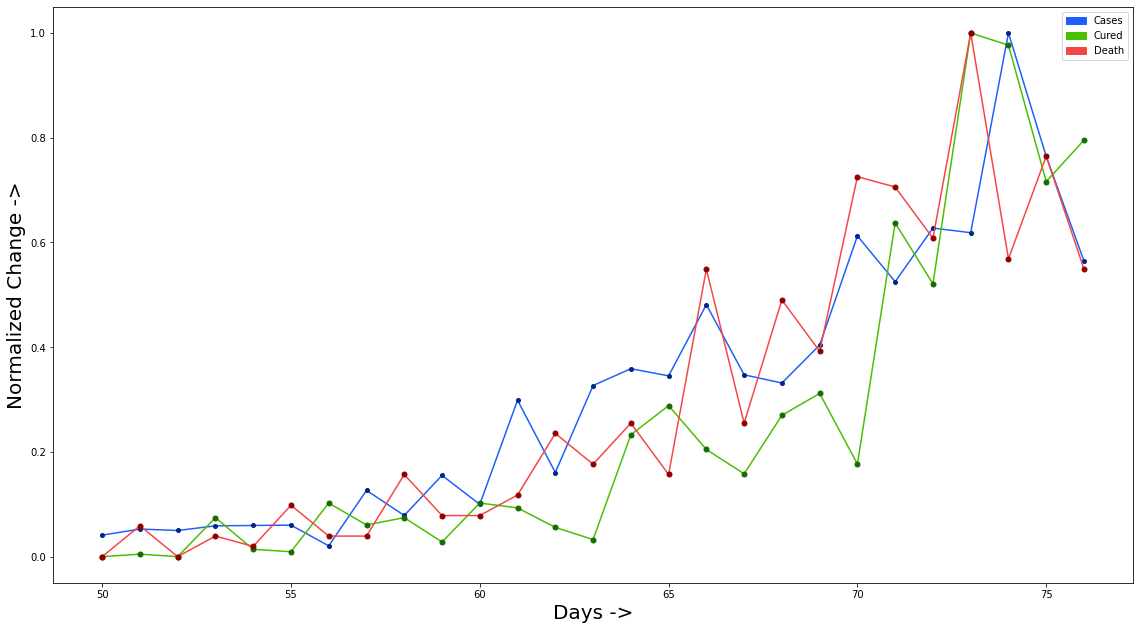

In [260]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
days = np.arange(50,len(death_only)-1,1)
ax.plot(days,cases_normalized[50:],color='#1F5EFA',marker='o',markersize = 4,markerfacecolor='#002787',markeredgecolor='#002787')
ax.plot(days,cured_normalized[50:] ,color='#48BF00',marker='o',markersize = 5,markerfacecolor='#156D00',markeredgecolor='#156D00')
ax.plot(days,death_normalized[50:],color='#F64545',marker='o',markersize = 5,markerfacecolor='#900000',markeredgecolor='#900000')
plt.xlabel('Days ->', fontsize=20)
plt.ylabel('Normalized Change ->', fontsize=20)
case_patch = mpatches.Patch(color='#1F5EFA', label='Cases')
cured_patch = mpatches.Patch(color='#48BF00',label='Cured')
death_patch = mpatches.Patch(color='#F64545',label='Death')
plt.legend(handles=[case_patch,cured_patch,death_patch])
plt.gcf().set_size_inches([15,8])
plt.show()

In [0]:
state_wise_dictPercentage = dict()

In [0]:
state_wise_dictSorted = dict(sorted(state_wise_dict.items()))

In [0]:
for key,value in state_wise_dictSorted.items():
    active_percent = ((value[0] - value[1]) * 100)/value[0]
    cured_percent = (value[1] * 100)/value[0]
    death_percent = (value[2] * 100)/value[0]
    state_wise_dictPercentage[key] = [active_percent,cured_percent,death_percent] 

In [0]:
statesSorted_ByCases = dict(sorted(state_wise_dictSorted.items(),key = lambda item:item[1][0],reverse=True))

In [0]:
top_5_states = list()
i = 0
for key,value in statesSorted_ByCases.items():
    top_5_states.append(key)
    i = i + 1
    if(i == 5):
        break

In [266]:
top_5_states

['Maharashtra', 'Delhi', 'Tamil Nadu', 'Madhya Pradesh', 'Rajasthan']

In [0]:
top_5_states_growth = dict()
for state in top_5_states:
    state_confirmed = np.array(confirmed[state_names == state])
    state_cured = np.array(cured[state_names == state])
    state_death = np.array(death[state_names == state])
    top_5_states_growth[state] = [state_confirmed,state_cured,state_death]

In [0]:
top_5_statesName = list(top_5_states_growth.keys())

**State 1**

In [0]:
state_1_cases = top_5_states_growth[top_5_statesName[0]][0]
state_1_cured = top_5_states_growth[top_5_statesName[0]][1]
state_1_death = top_5_states_growth[top_5_statesName[0]][2]

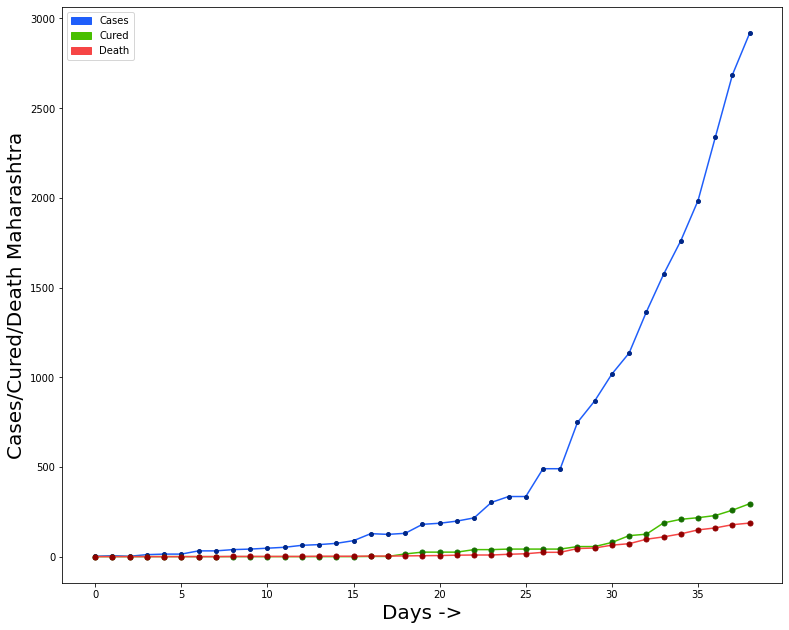

In [270]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
days = np.arange(0,len(state_1_cases),1)
ax.plot(days,state_1_cases,color='#1F5EFA',marker='o',markersize = 4,markerfacecolor='#002787',markeredgecolor='#002787')
ax.plot(days,state_1_cured,color='#48BF00',marker='o',markersize = 5,markerfacecolor='#156D00',markeredgecolor='#156D00')
ax.plot(days,state_1_death,color='#F64545',marker='o',markersize = 5,markerfacecolor='#900000',markeredgecolor='#900000')
plt.xlabel('Days ->', fontsize=20)
plt.ylabel(f"Cases/Cured/Death {top_5_statesName[0]}", fontsize=20)
case_patch = mpatches.Patch(color='#1F5EFA', label='Cases')
cured_patch = mpatches.Patch(color='#48BF00',label='Cured')
death_patch = mpatches.Patch(color='#F64545',label='Death')
plt.legend(handles=[case_patch,cured_patch,death_patch])
plt.gcf().set_size_inches([10,8])
plt.show()

**State 2**

In [0]:
state_2_cases = top_5_states_growth[top_5_statesName[1]][0]
state_2_cured = top_5_states_growth[top_5_statesName[1]][1]
state_2_death = top_5_states_growth[top_5_statesName[1]][2]

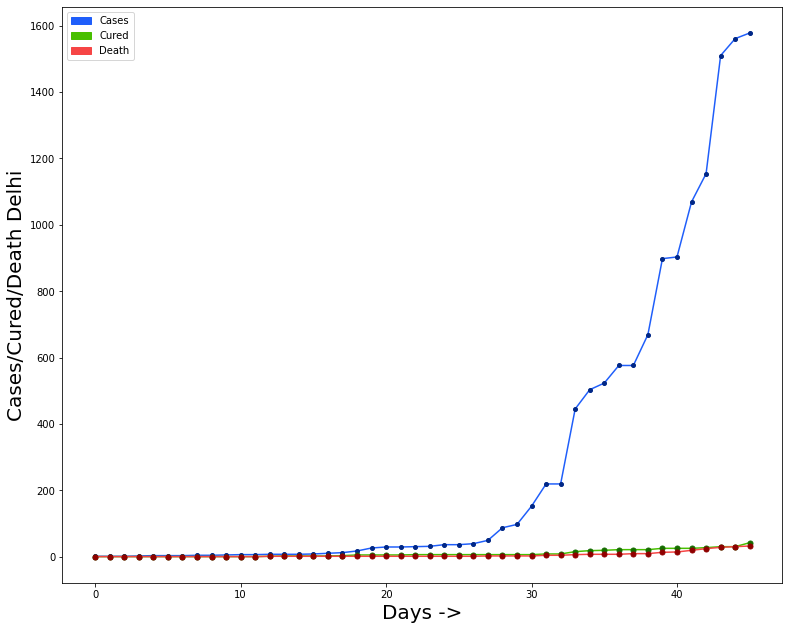

In [272]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
days = np.arange(0,len(state_2_cases),1)
ax.plot(days,state_2_cases,color='#1F5EFA',marker='o',markersize = 4,markerfacecolor='#002787',markeredgecolor='#002787')
ax.plot(days,state_2_cured,color='#48BF00',marker='o',markersize = 5,markerfacecolor='#156D00',markeredgecolor='#156D00')
ax.plot(days,state_2_death,color='#F64545',marker='o',markersize = 5,markerfacecolor='#900000',markeredgecolor='#900000')
plt.xlabel('Days ->', fontsize=20)
plt.ylabel(f"Cases/Cured/Death {top_5_statesName[1]}", fontsize=20)
case_patch = mpatches.Patch(color='#1F5EFA', label='Cases')
cured_patch = mpatches.Patch(color='#48BF00',label='Cured')
death_patch = mpatches.Patch(color='#F64545',label='Death')
plt.legend(handles=[case_patch,cured_patch,death_patch])
plt.gcf().set_size_inches([10,8])
plt.show()

**State 3**

In [0]:
state_3_cases = top_5_states_growth[top_5_statesName[2]][0]
state_3_cured = top_5_states_growth[top_5_statesName[2]][1]
state_3_death = top_5_states_growth[top_5_statesName[2]][2]

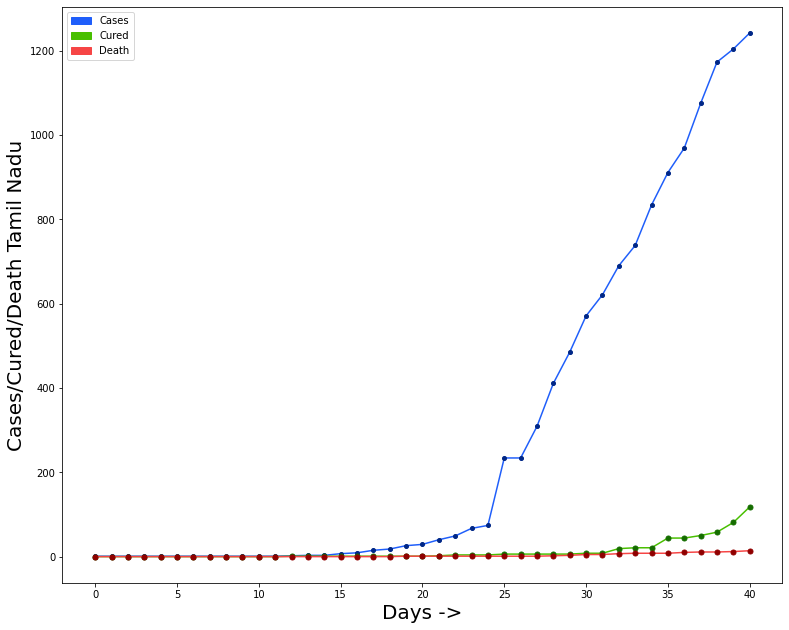

In [274]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
days = np.arange(0,len(state_3_cases),1)
ax.plot(days,state_3_cases,color='#1F5EFA',marker='o',markersize = 4,markerfacecolor='#002787',markeredgecolor='#002787')
ax.plot(days,state_3_cured,color='#48BF00',marker='o',markersize = 5,markerfacecolor='#156D00',markeredgecolor='#156D00')
ax.plot(days,state_3_death,color='#F64545',marker='o',markersize = 5,markerfacecolor='#900000',markeredgecolor='#900000')
plt.xlabel('Days ->', fontsize=20)
plt.ylabel(f"Cases/Cured/Death {top_5_statesName[2]}", fontsize=20)
case_patch = mpatches.Patch(color='#1F5EFA', label='Cases')
cured_patch = mpatches.Patch(color='#48BF00',label='Cured')
death_patch = mpatches.Patch(color='#F64545',label='Death')
plt.legend(handles=[case_patch,cured_patch,death_patch])
plt.gcf().set_size_inches([10,8])
plt.show()

**State 4**

In [0]:
state_4_cases = top_5_states_growth[top_5_statesName[3]][0]
state_4_cured = top_5_states_growth[top_5_statesName[3]][1]
state_4_death = top_5_states_growth[top_5_statesName[3]][2]

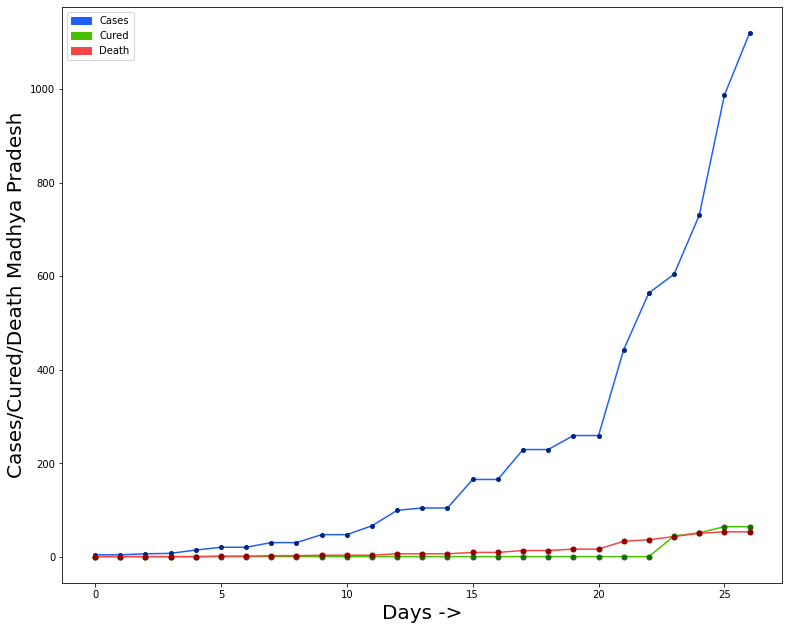

In [276]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
days = np.arange(0,len(state_4_cases),1)
ax.plot(days,state_4_cases,color='#1F5EFA',marker='o',markersize = 4,markerfacecolor='#002787',markeredgecolor='#002787')
ax.plot(days,state_4_cured,color='#48BF00',marker='o',markersize = 5,markerfacecolor='#156D00',markeredgecolor='#156D00')
ax.plot(days,state_4_death,color='#F64545',marker='o',markersize = 5,markerfacecolor='#900000',markeredgecolor='#900000')
plt.xlabel('Days ->', fontsize=20)
plt.ylabel(f"Cases/Cured/Death {top_5_statesName[3]}", fontsize=20)
case_patch = mpatches.Patch(color='#1F5EFA', label='Cases')
cured_patch = mpatches.Patch(color='#48BF00',label='Cured')
death_patch = mpatches.Patch(color='#F64545',label='Death')
plt.legend(handles=[case_patch,cured_patch,death_patch])
plt.gcf().set_size_inches([10,8])
plt.show()

**State 5**

In [0]:
state_5_cases = top_5_states_growth[top_5_statesName[4]][0]
state_5_cured = top_5_states_growth[top_5_statesName[4]][1]
state_5_death = top_5_states_growth[top_5_statesName[4]][2]

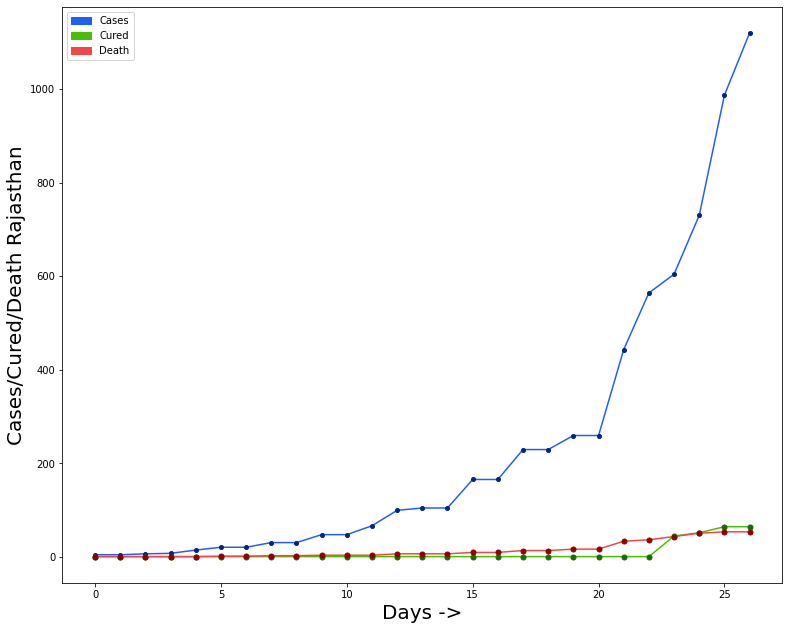

In [278]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
days = np.arange(0,len(state_4_cases),1)
ax.plot(days,state_4_cases,color='#1F5EFA',marker='o',markersize = 4,markerfacecolor='#002787',markeredgecolor='#002787')
ax.plot(days,state_4_cured,color='#48BF00',marker='o',markersize = 5,markerfacecolor='#156D00',markeredgecolor='#156D00')
ax.plot(days,state_4_death,color='#F64545',marker='o',markersize = 5,markerfacecolor='#900000',markeredgecolor='#900000')
plt.xlabel('Days ->', fontsize=20)
plt.ylabel(f"Cases/Cured/Death {top_5_statesName[4]}", fontsize=20)
case_patch = mpatches.Patch(color='#1F5EFA', label='Cases')
cured_patch = mpatches.Patch(color='#48BF00',label='Cured')
death_patch = mpatches.Patch(color='#F64545',label='Death')
plt.legend(handles=[case_patch,cured_patch,death_patch])
plt.gcf().set_size_inches([10,8])
plt.show()